<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train_dir="/content/drive/MyDrive/fathima/train"
val_dir="/content/drive/MyDrive/fathima/valid"

In [5]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 2639 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
model=Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [10]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [20]:
history_1=model.fit(train_data,
                      epochs=50,
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/50
2639/2639 [==============================] - 151s 57ms/step - loss: 0.6936 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
2639/2639 [==============================] - 151s 57ms/step - loss: 0.6935 - accuracy: 0.4911 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
2639/2639 [==============================] - 151s 57ms/step - loss: 0.6935 - accuracy: 0.4919 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
2639/2639 [==============================] - 150s 57ms/step - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/50
2639/2639 [==============================] - 150s 57ms/step - loss: 0.6935 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
2639/2639 [==============================] - 149s 57ms/step - loss: 0.6937 - accuracy: 0.4847 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
2639/2639 [==============================] - 150s 57ms/step - loss: 0.6936 - accuracy: 0.4941 - val_loss: 0

In [21]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[1. 0.]]":
    plt.xlabel("Autism",fontsize=30)
  elif val=="[[0. 1.]]":
    plt.xlabel("No Autism",fontsize=30)

1/1 [==============================] - 0s 45ms/step
[[0.48445502 0.515545  ]]


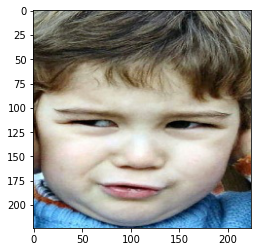

In [22]:
predictImage("/content/drive/MyDrive/autism/Autism/test/autistic/004.jpg")